In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
df=pd.read_csv('final dataset.csv')

In [ ]:
df

,age,sex,bps,fbs,hr,cp,chol,exng,sob,restecg,target
0,55,0,160,0,92,1,1,1,1,1,1
1,55,0,100,0,96,1,1,1,1,1,1
2,69,0,160,0,98,1,1,1,1,1,1
3,35,0,100,0,82,1,1,1,1,1,1
4,70,0,100,0,98,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,50,1,120,1,98,1,1,1,1,1,1
96,56,0,140,0,91,1,0,1,1,0,0
97,50,1,100,0,97,1,0,1,1,1,1
98,45,1,130,0,72,0,1,1,1,1,1


In [ ]:
df.isnull().sum()

age         0
sex         0
bps         0
fbs         0
hr          0
cp          0
chol        0
exng        0
sob         0
restecg     0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,bps,fbs,hr,cp,chol,exng,sob,restecg,target
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,55.240000,0.57000,129.900000,0.160000,87.440000,0.610000,0.460000,0.460000,0.590000,0.620000,0.650000
std,10.372964,0.49757,19.019129,0.368453,7.418677,0.490207,0.500908,0.500908,0.494311,0.487832,0.479372
min,25.000000,0.00000,94.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.00000,120.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.500000,1.00000,129.000000,0.000000,87.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,62.000000,1.00000,142.000000,0.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,76.000000,1.00000,188.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(11.5, -0.5)

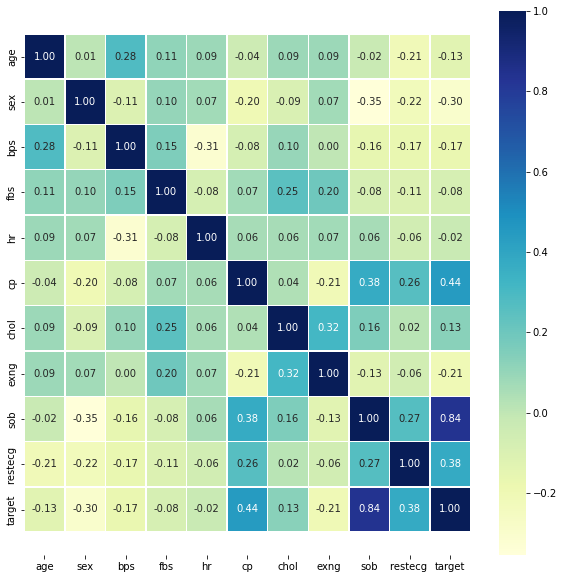

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

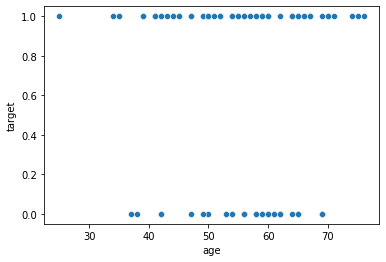

In [ ]:
sns.scatterplot(x='age',y='target',data=df)

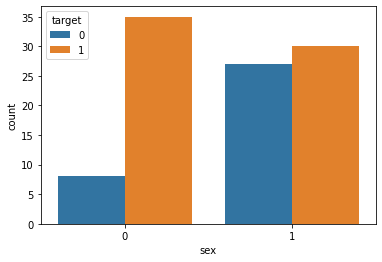

In [ ]:
sns.countplot(x='sex',hue='target',data=df)

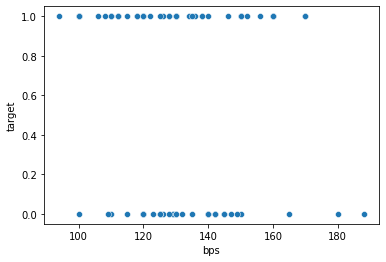

In [ ]:
sns.scatterplot(x='bps',y='target',data=df)

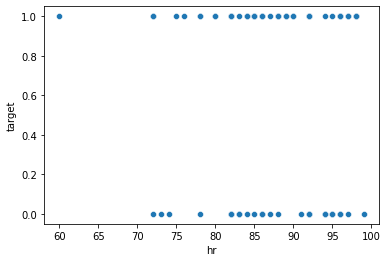

In [ ]:
sns.scatterplot(x='hr',y='target',data=df)

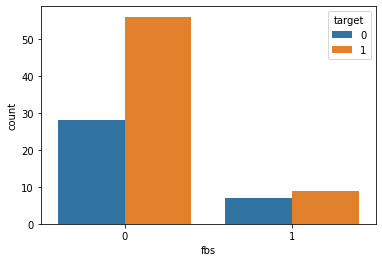

In [ ]:
sns.countplot(x='fbs',hue='target',data=df)

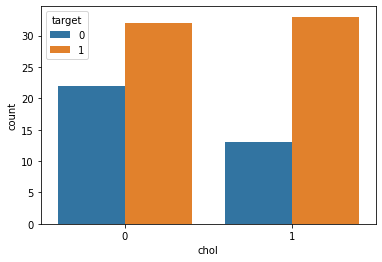

In [ ]:
sns.countplot(x='chol',hue='target',data=df)

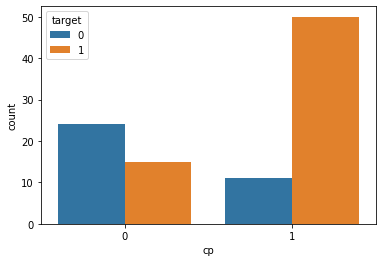

In [ ]:
sns.countplot(x='cp',hue='target',data=df)

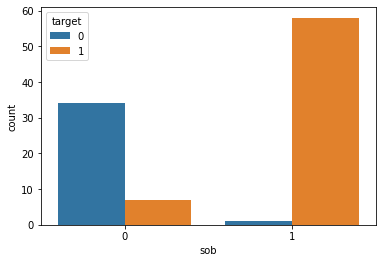

In [ ]:
sns.countplot(x='sob',hue='target',data=df)

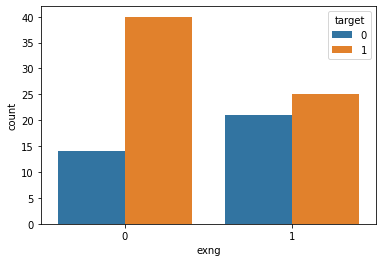

In [ ]:
sns.countplot(x='exng',hue='target',data=df)

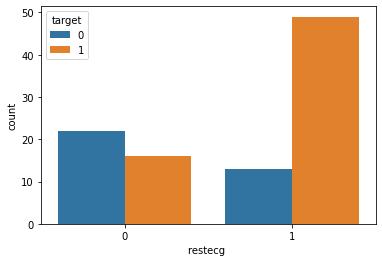

In [ ]:
sns.countplot(x='restecg ',hue='target',data=df)

In [ ]:
x=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
Feature=SelectKBest()

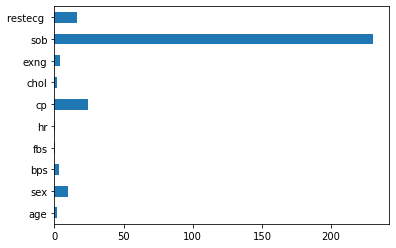

In [ ]:
Feature.fit(x,y)
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [ ]:
top=list(pd.Series(Feature.scores_,index=x.columns).nlargest(8).keys())
x=df[top]

In [ ]:
Forest=RandomForestClassifier(n_estimators=7)
KNN=KNeighborsClassifier(n_neighbors=13)
Tree=DecisionTreeClassifier()
LGB=LGBMClassifier()
XGB=XGBClassifier()
Support=SVC(gamma='auto')
GNB=GaussianNB()
BNB=BernoulliNB()
LDA=LinearDiscriminantAnalysis()
LR=LogisticRegression()

In [ ]:
Algo=[Forest,KNN,Tree,LGB,XGB,Support,GNB,BNB,LDA,LR]

In [ ]:
Scores=[]
averages=[]
for i in Algo:
  cv_score=cross_val_score(i,x,y,cv=10)
  Scores.append(cv_score)
  averages.append(cv_score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
Algo_name=pd.DataFrame(["Forest","KNN","Tree","LGB","XGB","Support","GNB","BNB","LDA","LR"],columns=['Algorithms'])
Scores=pd.DataFrame(Scores)
averages=pd.DataFrame(averages,columns=["Average"])

In [ ]:
Table=pd.concat([Algo_name,Scores],axis=1)
Table=pd.concat([Table,averages],axis=1)
Table

,Algorithms,0,1,2,3,4,5,6,7,8,9,Average
0,Forest,1.0,1.0,1.0,0.9,0.9,1.0,1.0,0.6,0.7,0.9,0.90
1,KNN,0.8,0.5,0.7,0.6,0.6,0.6,0.7,0.6,0.4,0.6,0.61
2,Tree,1.0,0.9,0.9,0.9,0.9,1.0,0.9,0.4,0.9,0.8,0.86
3,LGB,1.0,1.0,1.0,0.9,0.9,0.9,1.0,0.6,0.9,0.9,0.91
4,XGB,1.0,1.0,1.0,0.9,0.9,0.9,1.0,0.5,0.9,0.8,0.89
5,Support,0.8,0.7,0.7,0.7,0.7,0.7,0.6,0.6,0.5,0.7,0.67
6,GNB,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.5,1.0,0.9,0.93
7,BNB,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,0.9,0.8,0.91
8,LDA,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.5,0.9,0.9,0.92
9,LR,1.0,1.0,1.0,0.9,1.0,0.8,1.0,0.5,0.8,0.9,0.89


In [ ]:
Algo_name=list(Algo_name['Algorithms'])

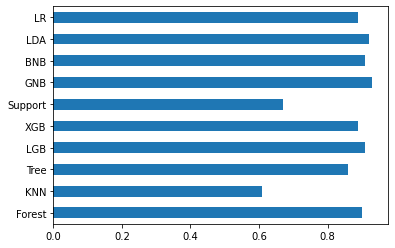

In [ ]:
pd.Series(list(Table['Average']),index=Algo_name).plot(kind='barh')

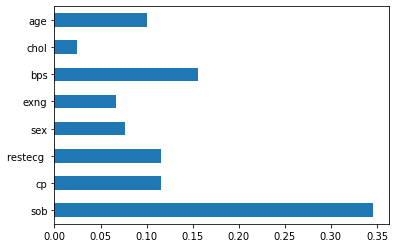

In [ ]:
Forest.fit(x,y)
pd.Series(Forest.feature_importances_,index=x.columns).plot(kind='barh')

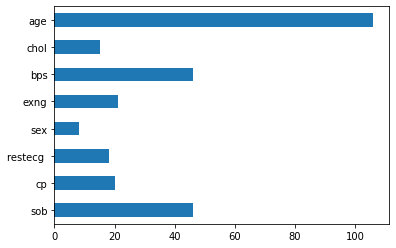

In [ ]:
LGB.fit(x,y)
pd.Series(LGB.feature_importances_,index=x.columns).plot(kind='barh')

In [ ]:
average=list(Table['Average'])

In [ ]:
Best=Algo[average.index(max(average))]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
Best.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
Best.score(xtest,ytest)

0.95

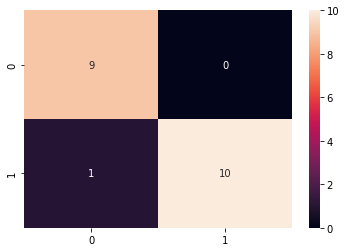

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
pred=Best.predict(xtest)
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [ ]:
x

,sob,cp,restecg,sex,exng,bps,chol,age
0,1,1,1,0,1,160,1,55
1,1,1,1,0,1,100,1,55
2,1,1,1,0,1,160,1,69
3,1,1,1,0,1,100,1,35
4,1,1,1,0,1,100,1,70
...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,120,1,50
96,1,1,0,0,1,140,0,56
97,1,1,1,1,1,100,0,50
98,1,0,1,1,1,130,1,45


In [ ]:
pred_feature=['sob','cp','restecg','sex','exng','bps','chol','age']
for_pred=[]
for i in pred_feature:
  item=input(f"Enter {i}:")
  for_pred.append(item)

Enter sob:1
Enter cp:0
Enter restecg:0
Enter sex:1
Enter exng:0
Enter bps:110
Enter chol:1
Enter age:21


In [ ]:
Best.predict([for_pred])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([1])

In [ ]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

